In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics 
from sklearn import linear_model
from sklearn.model_selection import validation_curve, ValidationCurveDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import validation_curve, ValidationCurveDisplay, cross_val_score


In [5]:
# Решил убрать показатели цепочки пептида и протеина, потому что не представляю, 
# как они работают на биологическом уровне, чтобы использовать их для составления регрессии
df = pd.concat(map(pd.read_csv, ['input_bcell.csv', 'input_sars.csv']), ignore_index=True) 
df = df.drop(columns= ['peptide_seq','protein_seq'])
# df = pd.get_dummies(df, columns=['peptide_seq','protein_seq'])
df = df.set_index('parent_protein_id')
# df.head()
print(f"{df.shape}")
#Задаём значение х у
y = df['target']
X = X = df.drop(columns = 'target')
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.8)
#Прогнозируем валентность антител (target 1 - антитела валентны)

(14907, 11)


Сначала попробовал сделать из каждой цепочки по пептидам и протеинам дамми переменные, но трудоемкость с точки зрения вычислительных процессов увеличилась раз в 100, а толк нулевой (оно и очевидно, потому что скорее всего тут необходимо переводить эту цепочки в векторное представление - тогда будет учитываться последовательность букв в цепи и можно будет сравнить, насколько близки между собой какие либо цепи.. если с биологической точки зрения можно их так сравнивать). Тем не менее, результаты отрицательные, тестовый показатель стремительно падает сразу же после начала кросс валидации, а самая высокая точность 

# Ковид - регрессия Решающими деревьями по максимальной глубине

In [107]:
#Решающие деревья
rg_tree = DecisionTreeRegressor(random_state=0, max_depth=10)
rg_tree.fit(X_train, y_train)
rg_tree.score(X_test,y_test)

0.10610813937141106

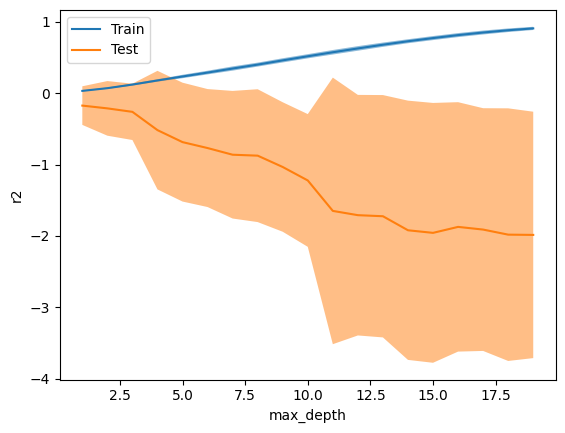

In [120]:
#СV Decision Tree Regr
param_range = np.arange(0, 20, 1)
train_scores, test_scores = validation_curve(rg_tree, X, y, param_name="max_depth", param_range=param_range, n_jobs=-1, cv=10, scoring="r2")
display = ValidationCurveDisplay( param_name='max_depth', param_range=param_range, train_scores=train_scores, test_scores=test_scores, score_name="r2" )
display.plot()


In [121]:
#Набор оценочных показателей (Decision Tree)
print(f"MSE|RMSE :{metrics.mean_squared_error(y_test, rg_tree.predict(X_test), squared=True), metrics.mean_squared_error(y_test, rg_tree.predict(X_test), squared=False)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, rg_tree.predict(X_test))}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, rg_tree.predict(X_test))}")
print(f"R2: {metrics.r2_score(y_test, rg_tree.predict(X_test))}")
print(f"Mean squared logarithmic error regression loss.: {metrics.mean_squared_log_error(y_test, rg_tree.predict(X_test))}")

MSE|RMSE :(0.17573611061434183, 0.4192089104662994)
MAE: 0.23985879148714664
MAPE: 515200117893494.4
R2: 0.10610813937141106
Mean squared logarithmic error regression loss.: 0.08488190522719662


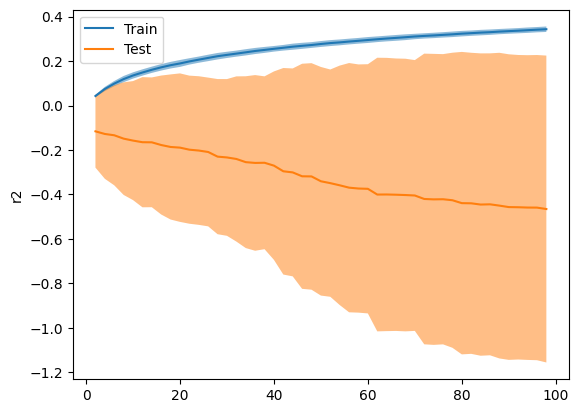

In [126]:
#Градиентный бустинг

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
gbr.score(X_test,y_test)

param_range = np.arange(0, 100, 2)
train_scores, test_scores = validation_curve(gbr, X, y, param_name="n_estimators", param_range=param_range, n_jobs=-1, cv=10, scoring="r2")
display = ValidationCurveDisplay( param_name='', param_range=param_range, train_scores=train_scores, test_scores=test_scores, score_name="r2" )
display.plot()

In [134]:
#Набор оценочных показателей (GBRR)
print(f"MSE|RMSE :{metrics.mean_squared_error(y_test, gbr.predict(X_test), squared=True), metrics.mean_squared_error(y_test, gbr.predict(X_test), squared=False)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, gbr.predict(X_test))}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, gbr.predict(X_test))}")
print(f"R2: {metrics.r2_score(y_test, gbr.predict(X_test))}")

MSE|RMSE :(0.14570338449953646, 0.3817111270313409)
MAE: 0.2986669483581714
MAPE: 638976361396586.4
R2: 0.2679990685861803


In [138]:
knn_r = KNeighborsRegressor()
knn_r.fit(X_train, y_train)
knn_r.score(X_test, y_test)

-0.06205644018006784

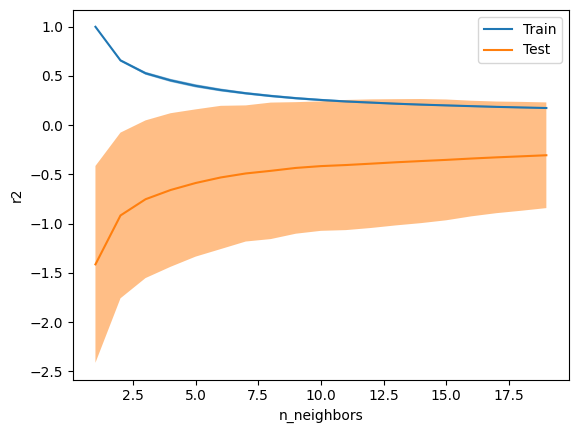

In [132]:
param_range = np.arange(0, 20, 1)
train_scores, test_scores = validation_curve(knn_r, X, y, param_name="n_neighbors", param_range=param_range, n_jobs=-1, cv=10, scoring="r2")
display = ValidationCurveDisplay( param_name='n_neighbors', param_range=param_range, train_scores=train_scores, test_scores=test_scores, score_name="r2" )
display.plot()

In [135]:
#Набор оценочных показателей (KNNR)
print(f"MSE|RMSE :{metrics.mean_squared_error(y_test, knn_r.predict(X_test), squared=True), metrics.mean_squared_error(y_test, knn_r.predict(X_test), squared=False)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, knn_r.predict(X_test))}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, knn_r.predict(X_test))}")
print(f"R2: {metrics.r2_score(y_test, knn_r.predict(X_test))}")
print(f"Mean squared logarithmic error regression loss.: {metrics.mean_squared_log_error(y_test, knn_r.predict(X_test))}")

MSE|RMSE :(0.21140030186147915, 0.4597828855682638)
MAE: 0.35024316619151435
MAPE: 720817622733926.4
R2: -0.06205644018006784
Mean squared logarithmic error regression loss.: 0.10526065644924366


In [13]:
quantile_reg = linear_model.QuantileRegressor(quantile=0.5, alpha=0.2,  fit_intercept=True, solver='highs-ipm')
quantile_reg.fit(X_train, y_train)
quantile_reg.score(X_test, y_test)

-0.37380486119110734

In [14]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.05533185842831623

In [15]:
ridge_reg = linear_model.Ridge(alpha=0.5, fit_intercept=True)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.055492497060893764

In [20]:
lasso_reg = linear_model.Lasso(alpha=0.5, fit_intercept=True)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.00469661180260128